In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [12]:
data_dim = 64

In [13]:
import numpy as np
import pandas as pd
import random

import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers

In [14]:
TRAIN_TEST_SPLIT = 0.1

In [15]:
readfile_dir = "drive/My Drive/Conference_ICOSES/Dataset_"+str(data_dim)+"p/"

In [16]:
list_filename = []

for species in ['Cocos', 'Eichhornia', 'Cucurbita', 'Neolamarckia']:
    if species in ['Cocos', 'Eichhornia']:
        seed_type = 'Monocot'
    elif species in ['Cucurbita', 'Neolamarckia']:
        seed_type = 'Diocot'

    for age in ['young', 'old', 'midAged']:
        for leaf_side in ['front', 'reverse']:
            filename = seed_type+'_'+species+'_'+age+'_'+leaf_side+'_'+str(data_dim)+'x'+str(data_dim)+'p.csv'
            list_filename.append(filename)
print(len(list_filename))

24


In [18]:
train_dataset = []
test_dataset = []
train_label_seed = []
test_label_seed = []
train_label_species = []
test_label_species = []

for (file_no, filename) in enumerate(list_filename):
    print('\n',file_no+1,'.',filename,':')

    if 'Cocos' in filename:
        label_seed = 0
        label_species = 0
    elif 'Eichhornia' in filename:
        label_seed = 0
        label_species = 1
    elif 'Cucurbita' in filename:
        label_seed = 1
        label_species = 2
    elif 'Neolamarckia' in filename:
        label_seed = 1
        label_species = 3
    #
    df_dataset = pd.read_csv(readfile_dir+filename, header = None)
    df_dataset = df_dataset.drop(df_dataset.columns[[0]], axis=1)
    #print(df_dataset.shape)
    #continue
    #
    test_indices = []
    for _ in range(int(TRAIN_TEST_SPLIT*(df_dataset.shape[0]))):
        while True:
            num = random.randint(0, (int(TRAIN_TEST_SPLIT*(df_dataset.shape[0]))-1))
            if num not in test_indices:
                test_indices.append(num)
                break
    #print(len(test_indices))
    #continue
    #
    for i in range(df_dataset.shape[0]):
        reshape_data = np.reshape(df_dataset.values[i], (data_dim,-1))
        if i in test_indices:
            test_dataset.append(reshape_data)
            test_label_seed.append(label_seed)
            test_label_species.append(label_species)
        else:
            train_dataset.append(reshape_data)
            train_label_seed.append(label_seed)
            train_label_species.append(label_species)
'''
    print('len(train_dataset)',len(train_dataset))
    print('len(train_label_seed)',len(train_label_seed))
    print('len(train_label_species)',len(train_label_species))
    print('len(test_dataset)',len(test_dataset))
    print('len(test_label_seed)',len(test_label_seed))
    print('len(test_label_species)',len(test_label_species))
#'''


 1 . Monocot_Cocos_young_front_64x64p.csv :

 2 . Monocot_Cocos_young_reverse_64x64p.csv :

 3 . Monocot_Cocos_old_front_64x64p.csv :

 4 . Monocot_Cocos_old_reverse_64x64p.csv :

 5 . Monocot_Cocos_midAged_front_64x64p.csv :

 6 . Monocot_Cocos_midAged_reverse_64x64p.csv :

 7 . Monocot_Eichhornia_young_front_64x64p.csv :

 8 . Monocot_Eichhornia_young_reverse_64x64p.csv :

 9 . Monocot_Eichhornia_old_front_64x64p.csv :

 10 . Monocot_Eichhornia_old_reverse_64x64p.csv :

 11 . Monocot_Eichhornia_midAged_front_64x64p.csv :

 12 . Monocot_Eichhornia_midAged_reverse_64x64p.csv :

 13 . Diocot_Cucurbita_young_front_64x64p.csv :

 14 . Diocot_Cucurbita_young_reverse_64x64p.csv :

 15 . Diocot_Cucurbita_old_front_64x64p.csv :

 16 . Diocot_Cucurbita_old_reverse_64x64p.csv :

 17 . Diocot_Cucurbita_midAged_front_64x64p.csv :

 18 . Diocot_Cucurbita_midAged_reverse_64x64p.csv :

 19 . Diocot_Neolamarckia_young_front_64x64p.csv :

 20 . Diocot_Neolamarckia_young_reverse_64x64p.csv :

 21 . Di

"\n    print('len(train_dataset)',len(train_dataset))\n    print('len(train_label_seed)',len(train_label_seed))\n    print('len(train_label_species)',len(train_label_species))\n    print('len(test_dataset)',len(test_dataset))\n    print('len(test_label_seed)',len(test_label_seed))\n    print('len(test_label_species)',len(test_label_species))\n#"

In [19]:
#df_train_dataset = pd.DataFrame(train_dataset)
#df_test_dataset = pd.DataFrame(test_dataset)

In [20]:
len(train_dataset)

39312

In [21]:
shuffle_indices = []
for _ in range(len(train_dataset)):
    while True:
        num = random.randint(0, (len(train_dataset)-1))
        if num not in shuffle_indices:
            shuffle_indices.append(num)
            break
print(len(shuffle_indices))

39312


In [22]:
train_dataset_shuffle = []
train_label_seed_shuffle = []
train_label_species_shuffle = []

for i in shuffle_indices:
    train_dataset_shuffle.append(train_dataset[i])
    train_label_seed_shuffle.append(train_label_seed[i])
    train_label_species_shuffle.append(train_label_species[i])

In [23]:
num_species = 4

'''
np_train_dataset = np.array(train_dataset)/255
np_test_dataset = np.array(test_dataset)/255
np_train_label_seed = np.array(train_label_seed)
np_test_label_seed = np.array(test_label_seed)
np_train_label_species = np.array(train_label_species)/num_species
np_test_label_species = np.array(test_label_species)/num_species
#'''
np_train_dataset = np.array(train_dataset_shuffle)/255
np_test_dataset = np.array(test_dataset)/255
np_train_label_seed = np.array(train_label_seed_shuffle)
np_test_label_seed = np.array(test_label_seed)
np_train_label_species = np.array(train_label_species_shuffle)/num_species
np_test_label_species = np.array(test_label_species)/num_species

In [24]:
print('np_train_dataset.shape',np_train_dataset.shape)
print('np_train_label_seed.shape',np_train_label_seed.shape)
print('np_train_label_species.shape',np_train_label_species.shape)
print('np_test_dataset.shape',np_test_dataset.shape)
print('np_test_label_seed.shape',np_test_label_seed.shape)
print('np_test_label_species.shape',np_test_label_species.shape)

np_train_dataset.shape (39312, 64, 64)
np_train_label_seed.shape (39312,)
np_train_label_species.shape (39312,)
np_test_dataset.shape (4344, 64, 64)
np_test_label_seed.shape (4344,)
np_test_label_species.shape (4344,)


In [25]:
unique_label_norm = [0.0, 0.25, 0.5, 0.75]
test_count_Cocos = 0
test_count_Eichhornia = 0
test_count_Cucurbita = 0
test_count_Neolamarckia = 0

for label in np_test_label_species:
    if label == 0.0:
        test_count_Cocos += 1
    elif label == 0.25:
        test_count_Eichhornia += 1
    elif label == 0.5:
        test_count_Cucurbita += 1
    elif label == 0.75:
        test_count_Neolamarckia += 1

print('test_count_Cocos =',test_count_Cocos)
print('test_count_Eichhornia =',test_count_Eichhornia)
print('test_count_Cucurbita =',test_count_Cucurbita)
print('test_count_Neolamarckia =',test_count_Neolamarckia)

test_count_Cocos = 1086
test_count_Eichhornia = 1086
test_count_Cucurbita = 1086
test_count_Neolamarckia = 1086


In [26]:
train_count_Cocos = 0
train_count_Eichhornia = 0
train_count_Cucurbita = 0
train_count_Neolamarckia = 0

for label in np_train_label_species:
    if label == 0.0:
        train_count_Cocos += 1
    elif label == 0.25:
        train_count_Eichhornia += 1
    elif label == 0.5:
        train_count_Cucurbita += 1
    elif label == 0.75:
        train_count_Neolamarckia += 1

print('train_count_Cocos =',train_count_Cocos)
print('train_count_Eichhornia =',train_count_Eichhornia)
print('train_count_Cucurbita =',train_count_Cucurbita)
print('train_count_Neolamarckia =',train_count_Neolamarckia)

train_count_Cocos = 9828
train_count_Eichhornia = 9828
train_count_Cucurbita = 9828
train_count_Neolamarckia = 9828


In [27]:
np_train_label_seed.shape

(39312,)

In [28]:
np_train_dataset2 = np.expand_dims(np_train_dataset, axis = 3)
np_train_label_species2 = np.expand_dims(np_train_label_species, axis = 1)

np_test_dataset2 = np.expand_dims(np_test_dataset, axis = 3)
np_test_label_species2 = np.expand_dims(np_test_label_species, axis = 1)

print(np_train_dataset2.shape)
print(np_train_label_species2.shape)

print(np_test_dataset2.shape)
print(np_test_label_species2.shape)

(39312, 64, 64, 1)
(39312, 1)
(4344, 64, 64, 1)
(4344, 1)


In [29]:
np_train_dataset2.shape[1:]

(64, 64, 1)

In [30]:
np_train_label_species2 = tf.keras.utils.to_categorical(train_label_species_shuffle, num_species)
np_test_label_species2 = tf.keras.utils.to_categorical(test_label_species, num_species)

In [31]:
def res_block(X, filter, stage):
    
  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 1
  X_copy = X
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [36]:
input_shape = np_train_dataset2.shape[1:] #(32,32,1) #np_train_dataset.shape #np.expand_dims(np_train_dataset, axis=1) #

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((1,1))(X_input)
#X = Input(input_shape)

# Stage #1
X = Conv2D(64, (5,5), strides= (1,1), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
#X = Conv2D(64, np_train_dataset.shape[1:3], strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0), data_format='channels_first')(X)
#X = Conv2D(64, np_train_dataset.shape[1:3], strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0), data_format='channels_first')(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
#print('ok1')
X = MaxPooling2D((3,3), strides= (1,1))(X)
#print('ok2')
# Stage #2
#X = res_block(X, filter= [64,64,256], stage= 2)

# Stage #3
X = res_block(X, filter= [128,512,128], stage = 2)

X = res_block(X, filter= [256,1024,256], stage = 3)

X = res_block(X, filter= [512,1024,256], stage = 4)

X = res_block(X, filter= [256,1024,256], stage = 5)

#X = res_block(X, filter= [64,64,256], stage= 6)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
#X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
#X = Dropout(0.1)(X)
#X = Dense(1024, activation = 'relu')(X)
#X = Dense(512, activation = 'relu')(X)
X = Dense(4, activation = 'softmax')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 66, 66, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 62, 62, 64)   1664        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 62, 62, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [37]:
#adam = tf.keras.optimizers.Adam(lr = 0.01) #, beta_1=0.9, beta_2=0.999, amsgrad=False
optimizer = tf.keras.optimizers.Adam(lr = 0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False) #, beta_1=0.9, beta_2=0.999, amsgrad=False
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [38]:
# save the best model with least validation loss
checkpointer_dir = "drive/My Drive/Conference_ICOSES/"
checkpointer_name  = "weights2_"+str(data_dim)+"p.hdf5"
checkpointer = ModelCheckpoint(filepath = checkpointer_dir+checkpointer_name, verbose = 1, save_best_only = True)

In [39]:
#39312
history = model.fit(np_train_dataset2, np_train_label_species2, 
                    shuffle=True, 
                    batch_size = 8, 
                    epochs= 15, 
                    #steps_per_epoch = 2,
                    validation_split = 0.1, 
                    callbacks=[checkpointer]
                    )

Epoch 1/15
4423/4423 [==============================] - ETA: 0s - loss: 0.7928 - categorical_accuracy: 0.6644
Epoch 00001: val_loss improved from inf to 0.80019, saving model to drive/My Drive/Conference_ICOSES/weights2_64p.hdf5
4423/4423 [==============================] - 919s 208ms/step - loss: 0.7928 - categorical_accuracy: 0.6644 - val_loss: 0.8002 - val_categorical_accuracy: 0.6940
Epoch 2/15
4423/4423 [==============================] - ETA: 0s - loss: 0.4671 - categorical_accuracy: 0.8134
Epoch 00002: val_loss improved from 0.80019 to 0.74663, saving model to drive/My Drive/Conference_ICOSES/weights2_64p.hdf5
4423/4423 [==============================] - 918s 208ms/step - loss: 0.4671 - categorical_accuracy: 0.8134 - val_loss: 0.7466 - val_categorical_accuracy: 0.7454
Epoch 3/15
4423/4423 [==============================] - ETA: 0s - loss: 0.3394 - categorical_accuracy: 0.8679
Epoch 00003: val_loss improved from 0.74663 to 0.72860, saving model to drive/My Drive/Conference_ICOSES/w

In [40]:
#model = load_model(checkpointer_dir+checkpointer_name)

In [41]:
result = model.evaluate(np_test_dataset2, np_test_label_species2)
print("Accuracy : {}, Loss: {}".format(result[1], result[0]))

136/136 [==============================] - 19s 139ms/step - loss: 0.9983 - categorical_accuracy: 0.7744
Accuracy : 0.7744014859199524, Loss: 0.9983119368553162


In [46]:
model_loaded = load_model(checkpointer_dir+checkpointer_name)

In [47]:
result2 = model_loaded.evaluate(np_test_dataset2, np_test_label_species2)
print("Accuracy : {}, Loss: {}".format(result2[1], result2[0]))

136/136 [==============================] - 18s 134ms/step - loss: 0.5605 - categorical_accuracy: 0.8421
Accuracy : 0.8420810103416443, Loss: 0.5605120062828064


In [42]:
#predict = model.predict(np_test_dataset2)

In [43]:
# Getting the model history keys 
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

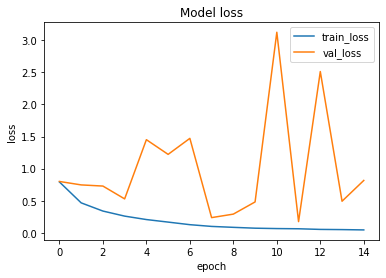

In [44]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

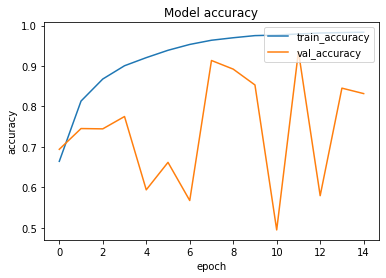

In [49]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'], loc = 'upper right')
plt.show()